In [26]:
# Costco Financial Analysis (1997-2007)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [27]:
# Try to set a pleasant style, fallback to default if not available
try:
    plt.style.use('ggplot')
except:
    print("'ggplot' style not available. Using default style.")

In [28]:
# Import the Excel file
try:
    df = pd.read_excel('costcoBook.xlsx', index_col=0)
    print("Data imported successfully. Shape:", df.shape)
    print("\nFirst few rows of the data:")
    print(df.head())
    print("\nColumn names (years):")
    print(df.columns)
except FileNotFoundError:
    print("Error: The file 'costcoBook.xlsx' was not found in the current directory.")
    print("Please ensure the file is in the same directory as this Jupyter Notebook.")
except Exception as e:
    print(f"An error occurred while trying to read the file: {e}")
    print("Please check the file format and contents.")

Data imported successfully. Shape: (71, 5)

First few rows of the data:
                                    1997        1998        1999        2000  \
Income Statement (thousands)                                                   
Revenue                              NaN         NaN         NaN         NaN   
Net sales                     21484000.0  23830000.0  26976000.0  31621000.0   
Membership fees and other       390000.0    440000.0    480000.0    543000.0   
Total revenues                21874000.0  24270000.0  27456000.0  32164000.0   
Operating expenses                   NaN         NaN         NaN         NaN   

                                    2001  
Income Statement (thousands)              
Revenue                              NaN  
Net sales                     34137000.0  
Membership fees and other       660000.0  
Total revenues                34797000.0  
Operating expenses                   NaN  

Column names (years):
Index([1997, 1998, 1999, 2000, 2001], dtype

In [29]:
# Function to create and display a line plot
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [30]:
# Calculate ROA and ROE
df.loc['ROA'] = df.loc['Net Income (loss)'] / df.loc['Total assets']*100
df.loc['ROE'] = df.loc['Net Income (loss)'] / df.loc['Total stockholder’s equity']*100

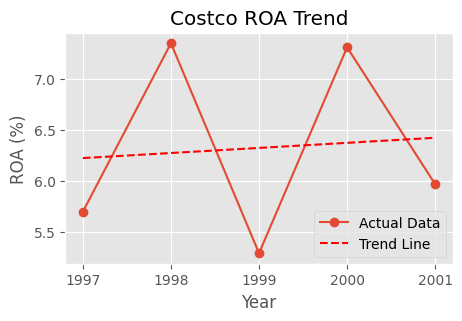

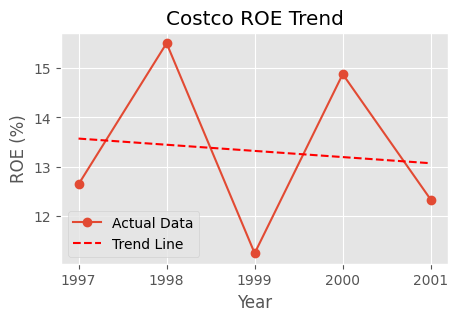

In [31]:
# Create ROA and ROE trend plots
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, label='Actual Data', marker='o')
    
    # Calculate trend line (1st-degree polynomial fit for linear trend)
    trend = np.polyfit(x.astype(float), y, 1)
    trend_line = np.poly1d(trend)
    
    # Plot the trend line
    plt.plot(x, trend_line(x.astype(float)), label='Trend Line', linestyle='--', color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROA'], 'Costco ROA Trend', 'Year', 'ROA (%)')
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROE'], 'Costco ROE Trend', 'Year', 'ROE (%)')

In [42]:
# DuPont Analysis -- NEEDS REVIEW: use 'Total revenues' instead of 'Net sales' to include membership fees? 
df.loc['Profit Margin w/o Membership'] = df.loc['Net Income (loss)'] / df.loc['Net sales']
df.loc['Profit Margin w/ Membership'] = df.loc['Net Income (loss)'] / df.loc['Total revenues']
df.loc['Asset Turnover w/o Membership'] = df.loc['Net sales'] / df.loc['Total assets']
df.loc['Asset Turnover w/ Membership'] = df.loc['Total revenues'] / df.loc['Total assets']
df.loc['Financial Leverage'] = df.loc['Total assets'] / df.loc['Total stockholder’s equity']

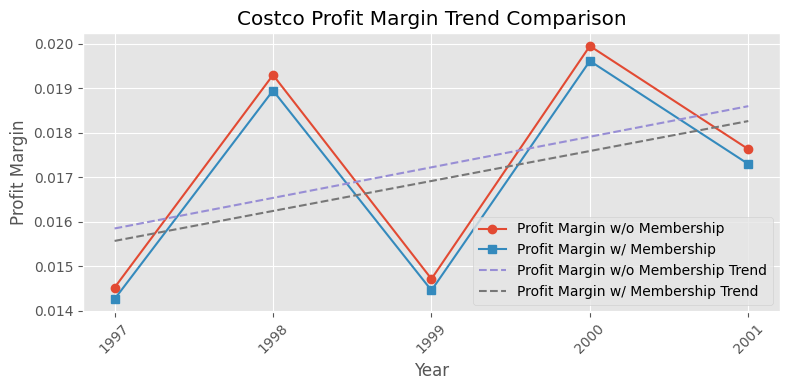

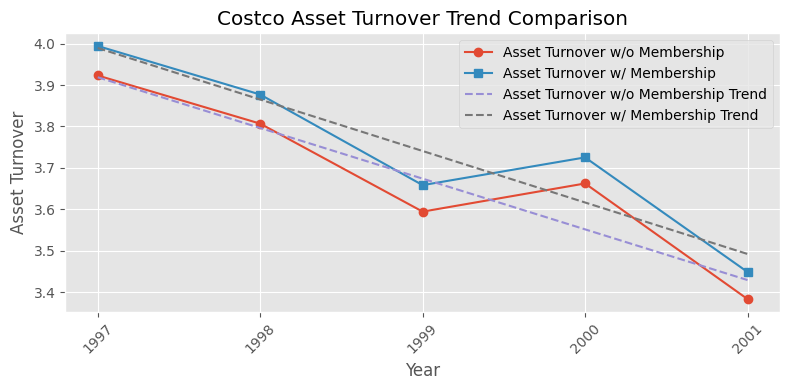

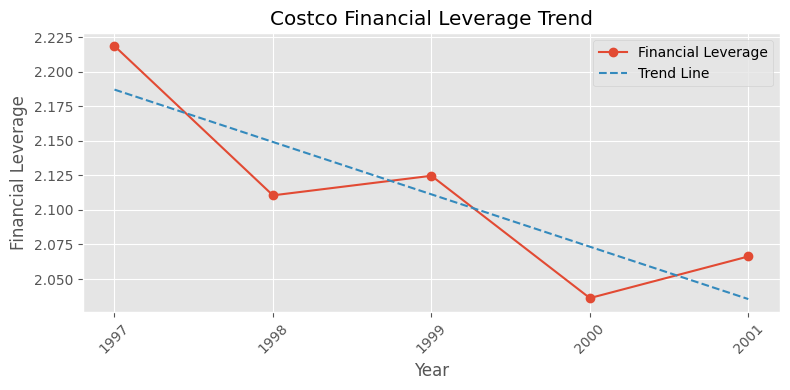

In [43]:


def create_combined_plot(df, metric1, metric2, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    
    x = df.columns.astype(int).astype(str)
    y1 = df.loc[metric1]
    y2 = df.loc[metric2]
    
    plt.plot(x, y1, label=metric1, marker='o')
    plt.plot(x, y2, label=metric2, marker='s')
    
    # Calculate and plot trend lines
    for y, metric in [(y1, metric1), (y2, metric2)]:
        trend = np.polyfit(range(len(x)), y, 1)
        trend_line = np.poly1d(trend)
        plt.plot(x, trend_line(range(len(x))), label=f'{metric} Trend', linestyle='--')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create Profit Margin plot
create_combined_plot(
    df,
    'Profit Margin w/o Membership',
    'Profit Margin w/ Membership',
    'Costco Profit Margin Trend Comparison',
    'Year',
    'Profit Margin'
)

# Create Asset Turnover plot
create_combined_plot(
    df,
    'Asset Turnover w/o Membership',
    'Asset Turnover w/ Membership',
    'Costco Asset Turnover Trend Comparison',
    'Year',
    'Asset Turnover'
)

# Create Financial Leverage plot (unchanged)
plt.figure(figsize=(8, 4))
x = df.columns.astype(int).astype(str)
y = df.loc['Financial Leverage']
plt.plot(x, y, label='Financial Leverage', marker='o')

# Calculate and plot trend line
trend = np.polyfit(range(len(x)), y, 1)
trend_line = np.poly1d(trend)
plt.plot(x, trend_line(range(len(x))), label='Trend Line', linestyle='--')

plt.title('Costco Financial Leverage Trend')
plt.xlabel('Year')
plt.ylabel('Financial Leverage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Time Series Analysis: Function to predict future values using linear regression
def predict_future(data, years_to_predict=5):
    x = np.arange(len(data))
    slope, intercept, _, _, _ = stats.linregress(x, data)
    future_x = np.arange(len(data), len(data) + years_to_predict)
    future_y = slope * future_x + intercept
    return future_y

In [45]:
# Predict future values for key metrics
last_year = int(df.columns[-1])
future_years = range(last_year + 1, last_year + 6)  # 5 years into the future
future_roa = predict_future(df.loc['ROA'])
future_roe = predict_future(df.loc['ROE'])

In [46]:
# Create a new DataFrame with both historical(1997-2001) and predicted data (2002-2006)
extended_df = df.copy()
for i, year in enumerate(future_years):
    extended_df[str(year)] = pd.Series({
        'ROA': future_roa[i],
        'ROE': future_roe[i]
    })
extended_df.loc[['ROA', 'ROE']]

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
Income Statement (thousands),,,,,,,,,,
ROA,5.697263,7.348454,5.289806,7.308367,5.966430,6.471538,6.521363,6.571187,6.621012,6.670837
ROE,12.641221,15.509699,11.239741,14.881093,12.328638,12.943947,12.818569,12.693192,12.567815,12.442438


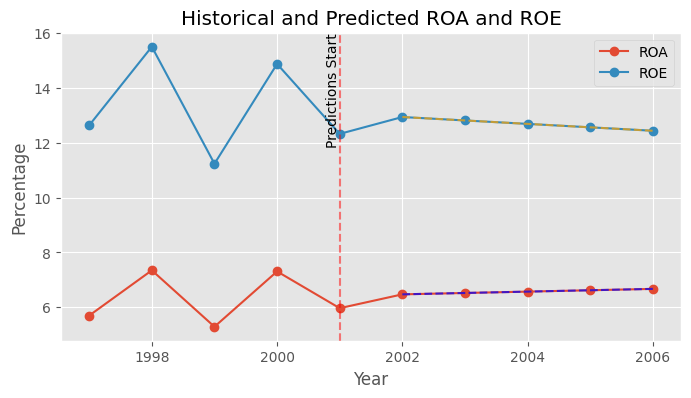

In [48]:
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROA'], label='ROA', marker='o')
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROE'], label='ROE', marker='o')

# Highlight the predicted values
plt.plot(future_years, future_roa, linestyle='--', color='blue', alpha=0.7)
plt.plot(future_years, future_roe, linestyle='--', color='orange', alpha=0.7)

plt.title('Historical and Predicted ROA and ROE')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical and predicted data
plt.axvline(x=last_year, color='red', linestyle='--', alpha=0.5)
plt.text(last_year, plt.ylim()[1], 'Predictions Start', rotation=90, va='top', ha='right')

plt.show()

In [ ]:
# # Print summary statistics
# print("\nSummary Statistics:")
# print(df.T.describe())  # Transpose the DataFrame for correct summary

In [49]:
# Additional analysis for third-level insights
print("\nYear-over-Year Growth Rates:")
for metric in ['Total revenues', 'Net Income (loss)', 'Total assets', 'Total stockholder’s equity']:
    growth_rates = df.loc[metric].pct_change() * 100
    df.loc[f'{metric} YoY Growth'] = growth_rates
    print(f"\n{metric} YoY Growth:")
    print(growth_rates)


Year-over-Year Growth Rates:

Total revenues YoY Growth:
1997          NaN
1998    10.953644
1999    13.127318
2000    17.147436
2001     8.186171
Name: Total revenues, dtype: float64

Net Income (loss) YoY Growth:
1997          NaN
1998    47.435897
1999   -13.695652
2000    58.942065
2001    -4.595880
Name: Net Income (loss), dtype: float64

Total assets YoY Growth:
1997          NaN
1998    14.307178
1999    19.891642
2000    15.042490
2001    16.861896
Name: Total assets, dtype: float64

Total stockholder’s equity YoY Growth:
1997          NaN
1998    20.168015
1999    19.091226
2000    20.049489
2001    15.156075
Name: Total stockholder’s equity, dtype: float64


In [50]:
# Analyze membership fees contribution
if 'Membership fees and other' in df.index:
    df.loc['Membership Fees % of Revenue'] = df.loc['Membership fees and other'] / df.loc['Total revenues'] * 100
    print("\nMembership Fees as % of Revenue:")
    print(df.loc['Membership Fees % of Revenue'])


Membership Fees as % of Revenue:
1997    1.782939
1998    1.812938
1999    1.748252
2000    1.688223
2001    1.896715
Name: Membership Fees % of Revenue, dtype: float64


In [51]:
# Analyze operating efficiency --- NEEDS Review
if 'Total operating expenses' in df.index:
    df.loc['Operating Expense Ratio'] = df.loc['Total operating expenses'] / df.loc['Total revenues']
    print("\nOperating Expense Ratio:")
    print(df.loc['Operating Expense Ratio'])


Operating Expense Ratio:
1997    0.973439
1998    0.967573
1999    0.968677
2000    0.967759
2001    0.971492
Name: Operating Expense Ratio, dtype: float64


In [101]:
# Analyze debt management
df.loc['Debt to Equity Ratio'] = (df.loc['Total assets'] - df.loc['Total stockholder’s equity']) / df.loc['Total stockholder’s equity']
print("\nDebt to Equity Ratio:")
print(df.loc['Debt to Equity Ratio'])


Debt to Equity Ratio:
1997    1.218824
1998    1.110607
1999    1.124793
2000    1.036172
2001    1.066334
Name: Debt to Equity Ratio, dtype: float64
